<a href="https://colab.research.google.com/github/mubasharjaved3567/Deep-Vision-Language-Models---Assignment-0/blob/main/Assignment_1_Building_a_Modern_ELT_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Extract and Load (EL) Implementation

In [27]:
!pip install kagglehub pytrends requests pandas
!pip install cloudscraper


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.7/99.7 kB 9.7 MB/s eta 0:00:00


In [28]:
import os

os.makedirs("data/raw", exist_ok=True)
os.makedirs("data/processed", exist_ok=True)


In [29]:
RAW_DIR = "data/raw"
PROCESSED_DIR = "data/processed"

ARBEITNOW_PAGES = 7
KAGGLE_DATASET = "khushikyad001/ai-impact-on-jobs-2030"

TRENDS_KEYWORDS = ["Artificial Intelligence", "Machine Learning", "Data Scientist"]
TRENDS_TIMEFRAME = "2023-01-01 2026-01-01"
TRENDS_GEO = "US"


In [125]:
import requests
import pandas as pd
import os
import time

def fetch_remotive_jobs(pages=1):
    jobs = []
    url = "https://remotive.com/api/remote-jobs"

    for page in range(1, pages + 1):
        response = requests.get(url)

        if response.status_code == 200:
            data = response.json()
            jobs.extend(data.get("jobs", []))
            time.sleep(1)
        else:
            print(f"Request failed: {response.status_code}")
            break

    df = pd.DataFrame(jobs)

    csv_path = os.path.join(RAW_DIR, "remotive_jobs.csv")
    json_path = os.path.join(RAW_DIR, "remotive_jobs.json")

    df.to_csv(csv_path, index=False)
    df.to_json(json_path, orient="records", lines=True)

    print("Remotive API data saved:", csv_path, json_path)
    return df



In [58]:
import kagglehub
import glob

def fetch_kaggle_dataset(dataset_name=KAGGLE_DATASET):
    folder_path = kagglehub.dataset_download(dataset_name)
    csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

    if not csv_files:
        raise FileNotFoundError("No CSV file found in Kaggle dataset")

    df = pd.read_csv(csv_files[0])

    csv_path = os.path.join(RAW_DIR, "kaggle_ai_jobs.csv")
    json_path = os.path.join(RAW_DIR, "kaggle_ai_jobs.json")
    df.to_csv(csv_path, index=False)
    df.to_json(json_path, orient="records", lines=True)

    print("Kaggle dataset saved:", csv_path, json_path)
    return df


In [59]:
from pytrends.request import TrendReq

def fetch_google_trends(keywords=TRENDS_KEYWORDS, timeframe=TRENDS_TIMEFRAME, geo=TRENDS_GEO):
    pytrends = TrendReq()
    pytrends.build_payload(keywords, timeframe=timeframe, geo=geo)
    df = pytrends.interest_over_time()

    if "isPartial" in df.columns:
        df = df.drop(columns=["isPartial"])

    csv_path = os.path.join(RAW_DIR, "ai_trends.csv")
    json_path = os.path.join(RAW_DIR, "ai_trends.json")
    df.to_csv(csv_path)
    df.to_json(json_path, orient="records", lines=True)

    print("Google Trends data saved:", csv_path, json_path)
    return df


In [60]:
def merge_all_data(api_df, kaggle_df, trends_df):
    merged_df = pd.concat([kaggle_df.reset_index(drop=True), trends_df.reset_index(drop=True)], axis=1, join='outer')

    csv_path = os.path.join(PROCESSED_DIR, "merged_ai_labor_data.csv")
    json_path = os.path.join(PROCESSED_DIR, "merged_ai_labor_data.json")
    merged_df.to_csv(csv_path, index=False)
    merged_df.to_json(json_path, orient="records", lines=True)

    print("Merged dataset saved:", csv_path, json_path)
    return merged_df


In [61]:
api_df = fetch_remotive_jobs()

kaggle_df = fetch_kaggle_dataset()

trends_df = fetch_google_trends()

merged_df = merge_all_data(api_df, kaggle_df, trends_df)

print("Pipeline completed successfully!")


Remotive API data saved: data/raw/remotive_jobs.csv data/raw/remotive_jobs.json
Using Colab cache for faster access to the 'ai-impact-on-jobs-2030' dataset.
Kaggle dataset saved: data/raw/kaggle_ai_jobs.csv data/raw/kaggle_ai_jobs.json
Google Trends data saved: data/raw/ai_trends.csv data/raw/ai_trends.json
Merged dataset saved: data/processed/merged_ai_labor_data.csv data/processed/merged_ai_labor_data.json
Pipeline completed successfully!


In [64]:
print("Total rows:", api_df.shape[0])


Total rows: 17


In [65]:
from IPython.display import display

print("=== Remotive Jobs API Data ===")
display(api_df.head(5))

print("=== Kaggle AI Jobs Data ===")
display(kaggle_df.head(5))

print("=== Google Trends Data ===")
display(trends_df.head(5))

print("=== Merged Data ===")
display(merged_df.head(5))


=== Remotive Jobs API Data ===


,id,url,title,company_name,company_logo,category,tags,job_type,publication_date,candidate_required_location,salary,description,company_logo_url
0,2069746,https://remotive.com/remote-jobs/software-deve...,Tech Lead Full-Stack Rails Engineer,Mitre Media,https://remotive.com/job/2069746/logo,Software Development,"[api, CSS, docker, elasticsearch, fullstack, h...",full_time,2026-02-14T20:46:44,"USA, Canada, USA timezones",$170k - $200k,"<p class=""h1"" dir=""ltr"" style=""line-height: 1....",https://remotive.com/job/2069746/logo
1,2069747,https://remotive.com/remote-jobs/software-deve...,Tech Lead Databricks Data Engineer,Mitre Media,https://remotive.com/job/2069747/logo,Software Development,"[apache, api, AWS, big data, cloud, java, pyth...",full_time,2026-02-14T20:46:35,"USA, Canada, USA timezones",$160k - $180k,"<div class=""h2"" dir=""ltr"" style=""line-height: ...",https://remotive.com/job/2069747/logo
2,2087694,https://remotive.com/remote-jobs/ai-ml/ai-trai...,AI Trainer,Anuttacon,https://remotive.com/job/2087694/logo,AI / ML,"[video, AI/ML, research, game design, data ana...",contract,2026-02-12T21:01:01,Worldwide,,"<p style=""--tw-border-spacing-x: 0; --tw-borde...",NaN
3,1680495,https://remotive.com/remote-jobs/marketing/off...,Office Assistant,Coalition Technologies,https://remotive.com/job/1680495/logo,Marketing,"[CSS, excel, frontend, git, html, illustrator,...",full_time,2026-02-11T20:16:31,Worldwide,"$31,2k- $52k","<p class=""h3"">WHY YOU SHOULD APPLY:</p>\n<p> <...",https://remotive.com/job/1680495/logo
4,1956455,https://remotive.com/remote-jobs/software-deve...,iOS Developer,nooro,https://remotive.com/job/1956455/logo,Software Development,"[api, backend, git, ios, security, swift, UI/U...",full_time,2026-02-09T21:15:55,USA,$60k-$130k (depending on experience),"<p style=""box-sizing: inherit; margin: var(--a...",NaN


=== Kaggle AI Jobs Data ===


,Job_Title,Average_Salary,Years_Experience,Education_Level,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Risk_Category,Skill_1,Skill_2,Skill_3,Skill_4,Skill_5,Skill_6,Skill_7,Skill_8,Skill_9,Skill_10
0,Security Guard,45795,28,Master's,0.18,1.28,0.85,High,0.45,0.10,0.46,0.33,0.14,0.65,0.06,0.72,0.94,0.00
1,Research Scientist,133355,20,PhD,0.62,1.11,0.05,Low,0.02,0.52,0.40,0.05,0.97,0.23,0.09,0.62,0.38,0.98
2,Construction Worker,146216,2,High School,0.86,1.18,0.81,High,0.01,0.94,0.56,0.39,0.02,0.23,0.24,0.68,0.61,0.83
3,Software Engineer,136530,13,PhD,0.39,0.68,0.60,Medium,0.43,0.21,0.57,0.03,0.84,0.45,0.40,0.93,0.73,0.33
4,Financial Analyst,70397,22,High School,0.52,1.46,0.64,Medium,0.75,0.54,0.59,0.97,0.61,0.28,0.30,0.17,0.02,0.42


=== Google Trends Data ===


,Artificial Intelligence,Machine Learning,Data Scientist
date,,,
2023-01-01,17,28,11
2023-01-08,24,32,13
2023-01-15,24,32,13
2023-01-22,26,35,13
2023-01-29,25,37,13


=== Merged Data ===


,Job_Title,Average_Salary,Years_Experience,Education_Level,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Risk_Category,Skill_1,Skill_2,...,Skill_4,Skill_5,Skill_6,Skill_7,Skill_8,Skill_9,Skill_10,Artificial Intelligence,Machine Learning,Data Scientist
0,Security Guard,45795,28,Master's,0.18,1.28,0.85,High,0.45,0.10,...,0.33,0.14,0.65,0.06,0.72,0.94,0.00,17.0,28.0,11.0
1,Research Scientist,133355,20,PhD,0.62,1.11,0.05,Low,0.02,0.52,...,0.05,0.97,0.23,0.09,0.62,0.38,0.98,24.0,32.0,13.0
2,Construction Worker,146216,2,High School,0.86,1.18,0.81,High,0.01,0.94,...,0.39,0.02,0.23,0.24,0.68,0.61,0.83,24.0,32.0,13.0
3,Software Engineer,136530,13,PhD,0.39,0.68,0.60,Medium,0.43,0.21,...,0.03,0.84,0.45,0.40,0.93,0.73,0.33,26.0,35.0,13.0
4,Financial Analyst,70397,22,High School,0.52,1.46,0.64,Medium,0.75,0.54,...,0.97,0.61,0.28,0.30,0.17,0.02,0.42,25.0,37.0,13.0


In [ ]:
%%writefile README.md
# AI Labor Market EL Pipeline

## Overview
This pipeline extracts, loads, and merges data from multiple sources to analyze AI labor market trends:

1. **ArbeitNow API** – Job postings data
2. **Kaggle Dataset** – AI impact on jobs dataset
3. **Google Trends** – Search interest for AI-related keywords

The pipeline stores both **raw and processed data** in **CSV** and **JSON** formats.
It is implemented in a **modular structure** with functions for each data source and merging.

---

## Folder Structure
project/
├─ data/
│ ├─ raw/ # Raw extracted data (CSV & JSON)
│ └─ processed/ # Processed/merged data (CSV & JSON)
├─ modules/ # Python modules for each task (extract, load, merge)
├─ run_pipeline.ipynb # Main Colab notebook to run the pipeline
└─ README.md # This documentation

## Pipeline Architecture
           +----------------+
           | ArbeitNow API  |
           +----------------+
                   |
                   v
           +----------------+
           |                |
           |     Merge      |
           |   & Process    |
           |                |
           +----------------+
                   |
           +-------+--------+
           |                |
+----------------+  +----------------+
| Kaggle Dataset |  | Google Trends  |
+----------------+  +----------------+
                   |
                   v
     data/processed/merged_ai_labor_data.csv/json

## How to Run

### 1. Install Required Libraries
Run the following command in Colab or terminal:

### 2. Prepare the Directories
The pipeline expects these folders:
- `data/raw/` – Stores raw CSV & JSON files from sources
- `data/processed/` – Stores merged and processed outputs

The pipeline will create them automatically if they don’t exist.

### 3. Run the Pipeline in Google Colab
- Open the notebook `run_pipeline.ipynb`
- Run cells **in this order**:
  1. Setup directories and configuration
  2. Fetch **ArbeitNow API** data
  3. Fetch **Kaggle Dataset**
  4. Fetch **Google Trends** data
  5. Merge datasets
  6. Save outputs to `data/processed/`

### 4. Run as Python Script (Optional)
If using a script locally or via terminal:


### 5. Check Outputs
- **Raw Data:** `data/raw/` (CSV & JSON)
- **Processed/Merged Data:** `data/processed/merged_ai_labor_data.csv`
- **JSON Version:** `data/processed/merged_ai_labor_data.json`

---

## Data Source Parameters

| Source | Parameter | Value / Notes |
|--------|----------|---------------|
| ArbeitNow API | Pages | 5 (configurable) |
| Kaggle Dataset | Dataset Name | khushikyad001/ai-impact-on-jobs-2030 |
| Google Trends | Keywords | ["Artificial Intelligence", "Machine Learning", "Data Scientist"] |
| Google Trends | Timeframe | "2023-01-01 2026-01-01" |
| Google Trends | Geo | US |

> All parameters are included directly in the pipeline; no separate config file or YAML is needed.

---

## Assumptions
1. ArbeitNow API pages limited to 5 for demonstration; can be increased.
2. Kaggle dataset contains at least one CSV file.
3. Google Trends data is merged with Kaggle dataset by index (not by date).
4. All data is stored locally in Colab directories and can be downloaded.

---

## Notes
- Modular functions for extraction, loading, and merging.
- CSV & JSON formats preserved for human-readable and semi-structured use.
- Fully executable in Google Colab.
- Folder structure, commands, and pipeline architecture included for easy submission.



Writing README.md


**(a) Data Heterogeneity:**

For this project, I used three types of data. The Kaggle CSV is structured like a spreadsheet, making it easy to analyze job titles, risk categories, and AI exposure. The ArbeitNow API JSON is semi-structured, giving real job postings with fields like title and company_name, but it needs some cleaning before use. The Google Trends data is unstructured time-series data showing search interest for AI keywords, helping us track public trends. Together, these sources give a complete view of the AI labor market — jobs, AI risk, and trending skills.

**(b) Extraction Challenges:**

While collecting data for this project, I faced a few practical and technical challenges. For example, we were initially asked to use Reddit data, but the API was blocked and my request for access was rejected, so we couldn’t use it. Many other sources either didn’t match our theme well or didn’t have enough quality data. On the technical side, working with Kaggle and APIs required handling authentication keys and making sure data from different sources could be aligned. Overall, the main challenge was matching and cleaning data from multiple sources while dealing with API restrictions and format differences.

**(c) Storage Justification:**

We can say that the storing data in different formats is useful because each type has its own purpose. For example, JSON is perfect for raw data from APIs because it keeps all the details and nested stuff intact. CSV is better for cleaned, organized tables since it’s easy to read, share, and work with in analysis. Usually, we save raw data as JSON to keep everything safe, and cleaned data as CSV for charts, graphs, and reports. This way, we don’t lose any original info but still make our analysis simple and manageable.

# Part 2: Transform, Clean, and Analyze

In [74]:
os.makedirs("data/cleaned", exist_ok=True)

In [87]:
def data_quality_summary(df, name, save_path=None):
    print(f"\n--- Data Quality: {name} ---\n")

    df_copy = df.copy()

    for col in df_copy.columns:
        if df_copy[col].dtype == 'object':
            df_copy[col] = df_copy[col].apply(lambda x: str(x) if isinstance(x, (list, dict)) else x)

    missing_per_col = df_copy.isnull().sum()
    print("Total missing values:", missing_per_col.sum())

    duplicate_count = df_copy.duplicated().sum()
    print("Duplicate rows:", duplicate_count)

    df_cleaned = df_copy.drop_duplicates()

    if save_path:
        df_cleaned.to_csv(save_path, index=False)
        print(f"Cleaned dataset saved to: {save_path}")

    return df_cleaned

api_df_clean = data_quality_summary(api_df, "Remotive API", "data/cleaned/remotive_jobs_cleaned.csv")
kaggle_df_clean = data_quality_summary(kaggle_df, "Kaggle Dataset", "data/cleaned/kaggle_ai_jobs_cleaned.csv")
trends_df_clean = data_quality_summary(trends_df, "Google Trends", "data/cleaned/ai_trends_cleaned.csv")



--- Data Quality: Remotive API ---

Total missing values: 4
Duplicate rows: 0
Cleaned dataset saved to: data/cleaned/remotive_jobs_cleaned.csv

--- Data Quality: Kaggle Dataset ---

Total missing values: 0
Duplicate rows: 0
Cleaned dataset saved to: data/cleaned/kaggle_ai_jobs_cleaned.csv

--- Data Quality: Google Trends ---

Total missing values: 0
Duplicate rows: 0
Cleaned dataset saved to: data/cleaned/ai_trends_cleaned.csv


In [124]:
trends_df = trends_df.drop_duplicates()
trends_df.to_csv("data/cleaned/ai_trends_cleaned.csv", index=False)


In [123]:
kaggle_df_clean = kaggle_df_clean.drop_duplicates()
kaggle_df_clean.to_csv("data/kaggle_ai_jobs_cleaned.csv", index=False)


In [122]:
api_df_clean = api_df_clean.drop_duplicates()
api_df_clean.to_csv("data/remotive_jobs_cleaned.csv", index=False)

In [121]:
print("Columns:", api_df.columns)
print("Shape before:", api_df.shape)

if 'created_at' in api_df.columns:
    api_df['created_at'] = pd.to_datetime(api_df['created_at'], errors='coerce')
    print("Null dates after conversion:", api_df['created_at'].isna().sum())
    print("Non-null dates:", api_df['created_at'].notna().sum())
    print(api_df['created_at'].head())


Columns: Index(['id', 'url', 'title', 'company_name', 'company_logo', 'category',
       'tags', 'job_type', 'publication_date', 'candidate_required_location',
       'salary', 'description', 'company_logo_url', 'date'],
      dtype='object')
Shape before: (17, 14)


Date range:
2026-01-16 14:01:26 to 2026-02-14 20:46:44


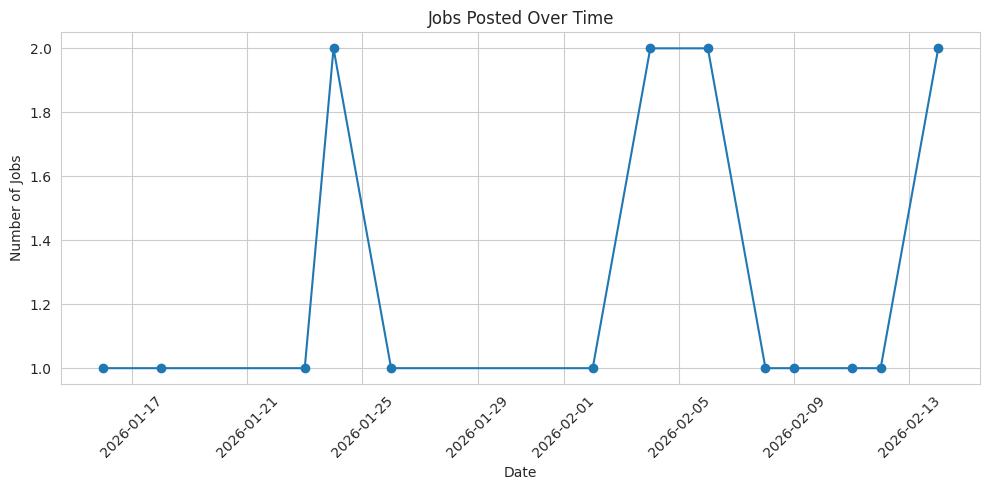

In [120]:
import matplotlib.pyplot as plt
import pandas as pd

if 'publication_date' in api_df.columns:

    api_df['publication_date'] = pd.to_datetime(api_df['publication_date'])

    api_df['date'] = api_df['publication_date'].dt.date

    daily_counts = api_df.groupby('date').size()

    print("Date range:")
    print(api_df['publication_date'].min(), "to", api_df['publication_date'].max())

    plt.figure(figsize=(10,5))
    plt.plot(daily_counts.index, daily_counts.values, marker='o')
    plt.title("Jobs Posted Over Time")
    plt.xlabel("Date")
    plt.ylabel("Number of Jobs")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


/tmp/ipython-input-229866669.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


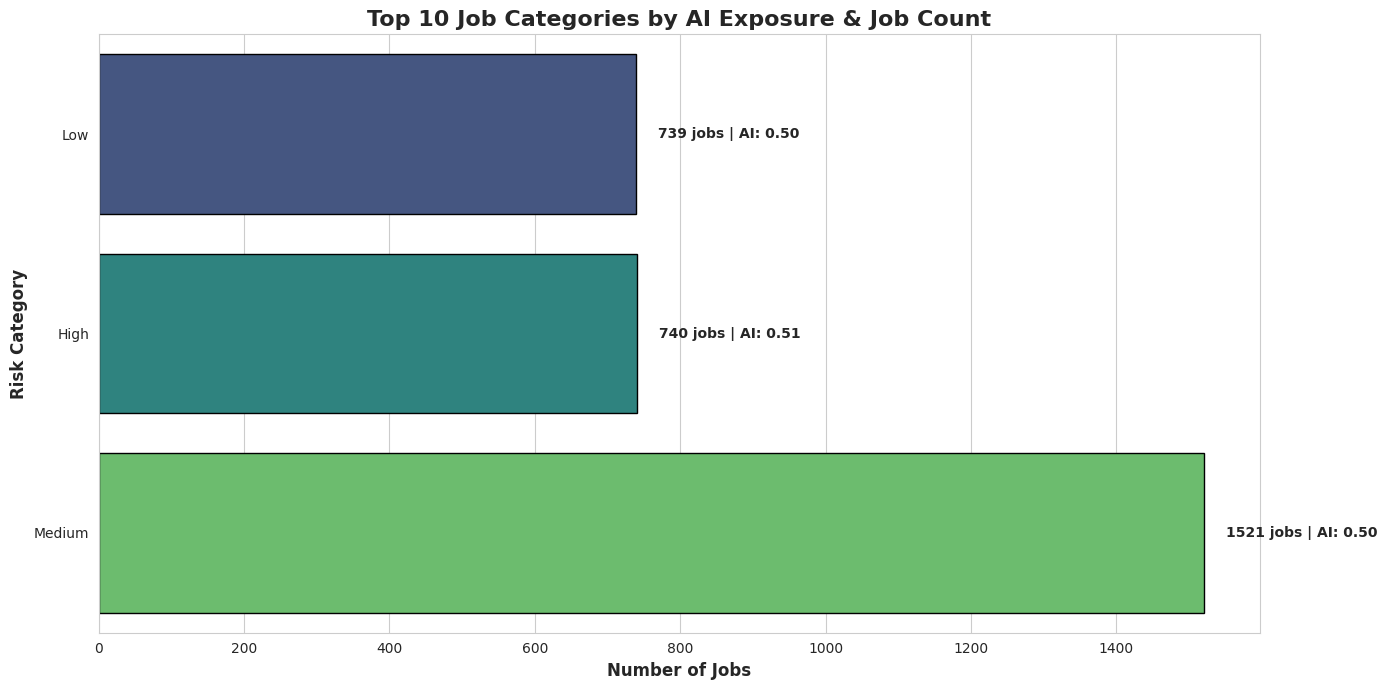

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

if 'Risk_Category' in kaggle_df.columns and 'AI_Exposure_Index' in kaggle_df.columns:

    agg_df = kaggle_df.groupby('Risk_Category').agg(
        Num_Jobs=('Job_Title', 'count'),
        Avg_AI_Exposure=('AI_Exposure_Index', 'mean')
    ).sort_values('Num_Jobs', ascending=True).tail(10)

    plt.figure(figsize=(14,7))
    sns.set_style("whitegrid")

    barplot = sns.barplot(
        x='Num_Jobs', y=agg_df.index, data=agg_df,
        palette="viridis", edgecolor='black'
    )

    for i, (jobs, ai_exp) in enumerate(zip(agg_df['Num_Jobs'], agg_df['Avg_AI_Exposure'])):
        barplot.text(jobs + max(agg_df['Num_Jobs'])*0.02, i,
                     f"{jobs} jobs | AI: {ai_exp:.2f}",
                     va='center', fontweight='bold', fontsize=10)

    plt.title("Top 10 Job Categories by AI Exposure & Job Count", fontsize=16, fontweight='bold')
    plt.xlabel("Number of Jobs", fontsize=12, fontweight='bold')
    plt.ylabel("Risk Category", fontsize=12, fontweight='bold')
    plt.tight_layout()
    plt.show()


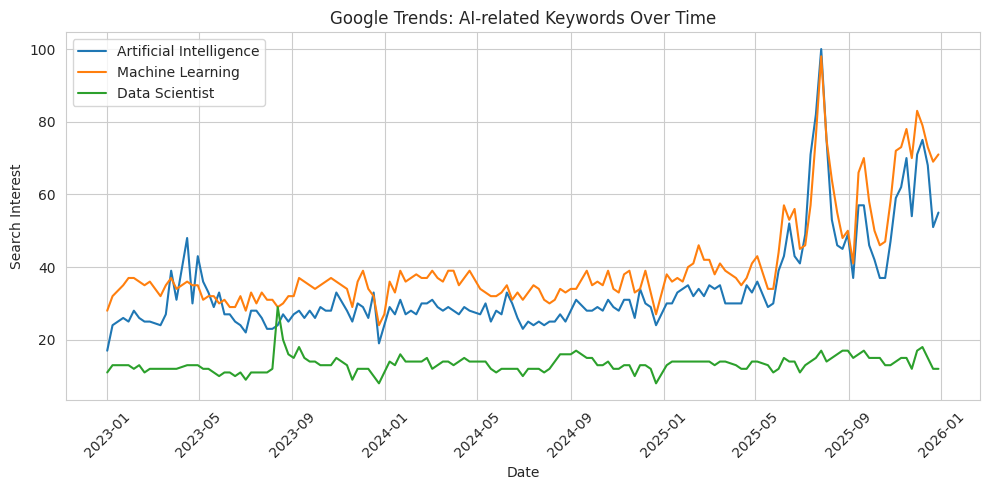

In [107]:
plt.figure(figsize=(10,5))
for col in trends_df.columns:
    plt.plot(trends_df.index, trends_df[col], label=col)
plt.title("Google Trends: AI-related Keywords Over Time")
plt.xlabel("Date")
plt.ylabel("Search Interest")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

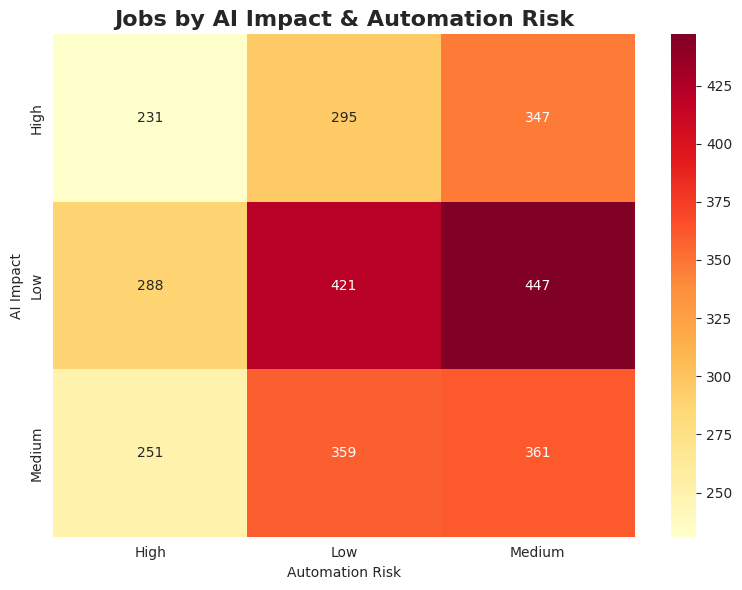

In [108]:
def categorize_ai(x):
    if x < 0.4:
        return "Low"
    elif x < 0.7:
        return "Medium"
    else:
        return "High"

def categorize_automation(x):
    if x < 0.4:
        return "Low"
    elif x < 0.7:
        return "Medium"
    else:
        return "High"

kaggle_df['AI_Impact_Level'] = kaggle_df['AI_Exposure_Index'].apply(categorize_ai)
kaggle_df['Automation_Risk_Level'] = kaggle_df['Automation_Probability_2030'].apply(categorize_automation)

heatmap_data = kaggle_df.pivot_table(
    index='AI_Impact_Level',
    columns='Automation_Risk_Level',
    values='Job_Title',
    aggfunc='count'
).fillna(0).astype(int)

plt.figure(figsize=(8,6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlOrRd', cbar=True)
plt.title("Jobs by AI Impact & Automation Risk", fontsize=16, fontweight='bold')
plt.xlabel("Automation Risk")
plt.ylabel("AI Impact")
plt.tight_layout()
plt.show()


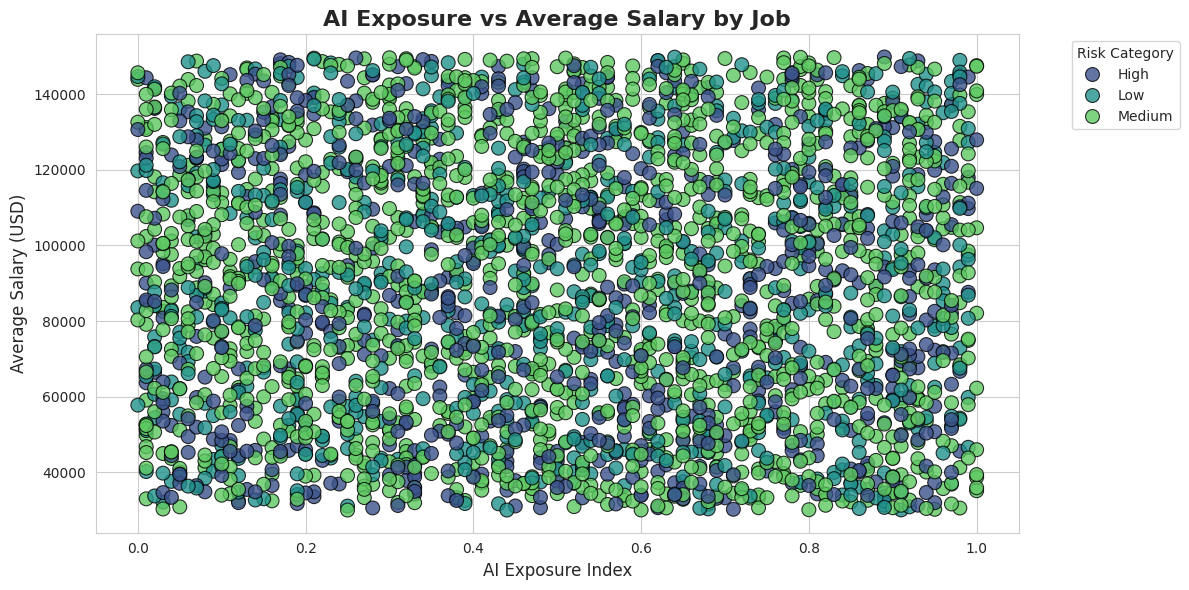

In [118]:
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=kaggle_df,
    x='AI_Exposure_Index',
    y='Average_Salary',
    hue='Risk_Category',
    palette='viridis',
    alpha=0.8,
    edgecolor='black',
    s=100
)

plt.title("AI Exposure vs Average Salary by Job", fontsize=16, fontweight='bold')
plt.xlabel("AI Exposure Index", fontsize=12)
plt.ylabel("Average Salary (USD)", fontsize=12)
plt.legend(title='Risk Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-1422078573.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


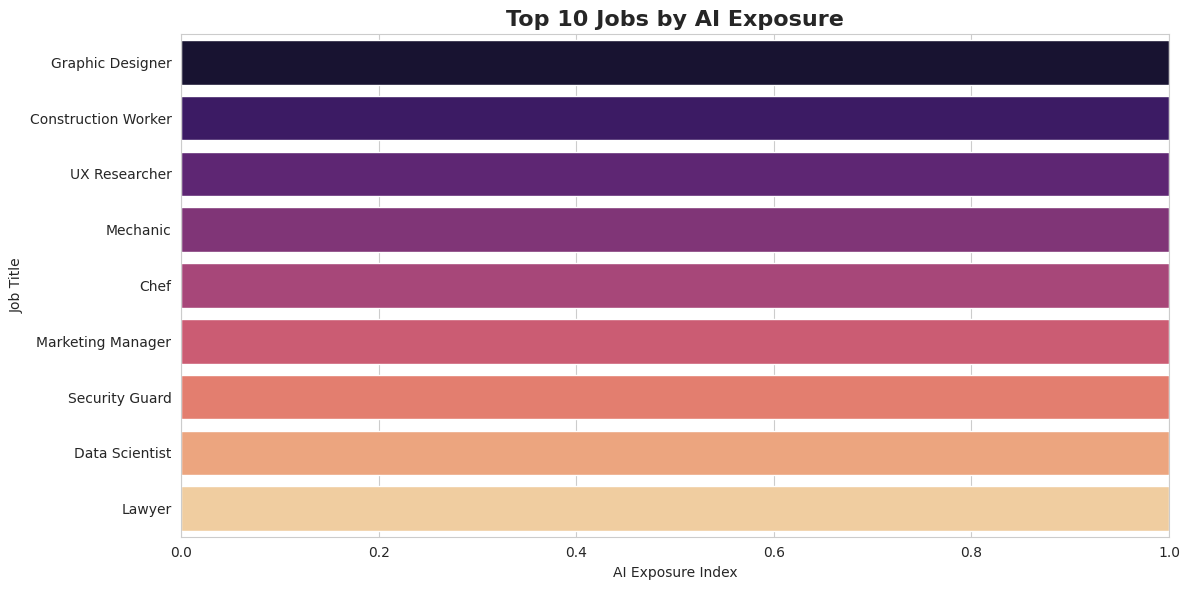

In [110]:
top_ai_jobs = kaggle_df.sort_values('AI_Exposure_Index', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(
    x='AI_Exposure_Index',
    y='Job_Title',
    data=top_ai_jobs,
    palette='magma'
)

plt.title("Top 10 Jobs by AI Exposure", fontsize=16, fontweight='bold')
plt.xlabel("AI Exposure Index")
plt.ylabel("Job Title")
plt.xlim(0,1)
plt.tight_layout()
plt.show()


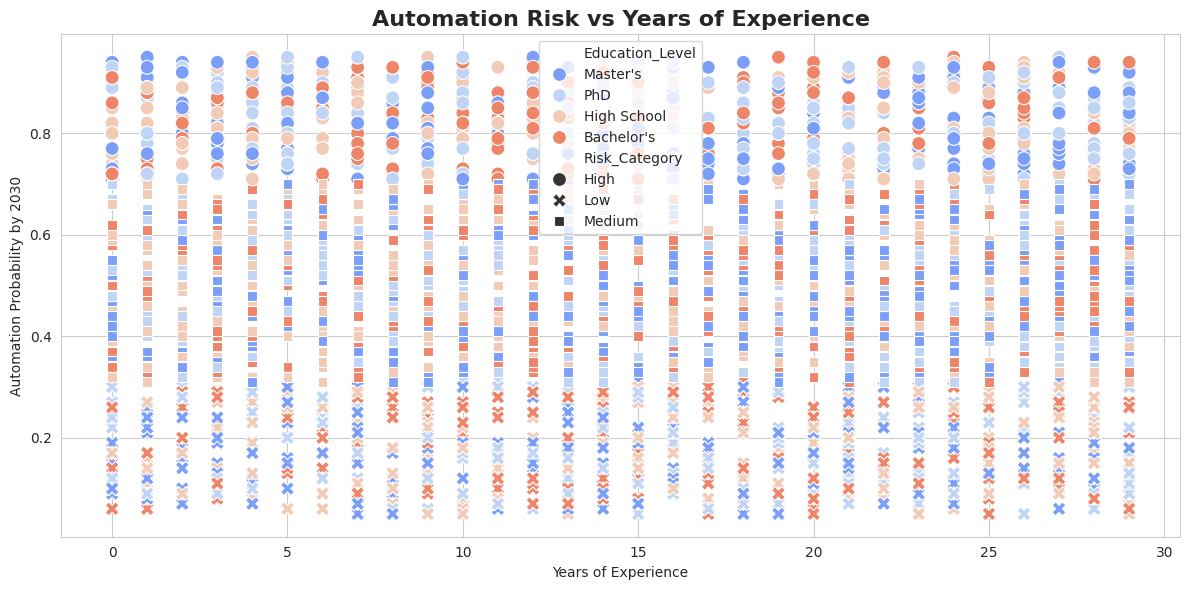

In [111]:
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=kaggle_df,
    x='Years_Experience',
    y='Automation_Probability_2030',
    hue='Education_Level',
    style='Risk_Category',
    s=100,
    palette='coolwarm'
)

plt.title("Automation Risk vs Years of Experience", fontsize=16, fontweight='bold')
plt.xlabel("Years of Experience")
plt.ylabel("Automation Probability by 2030")
plt.grid(True)
plt.tight_layout()
plt.show()


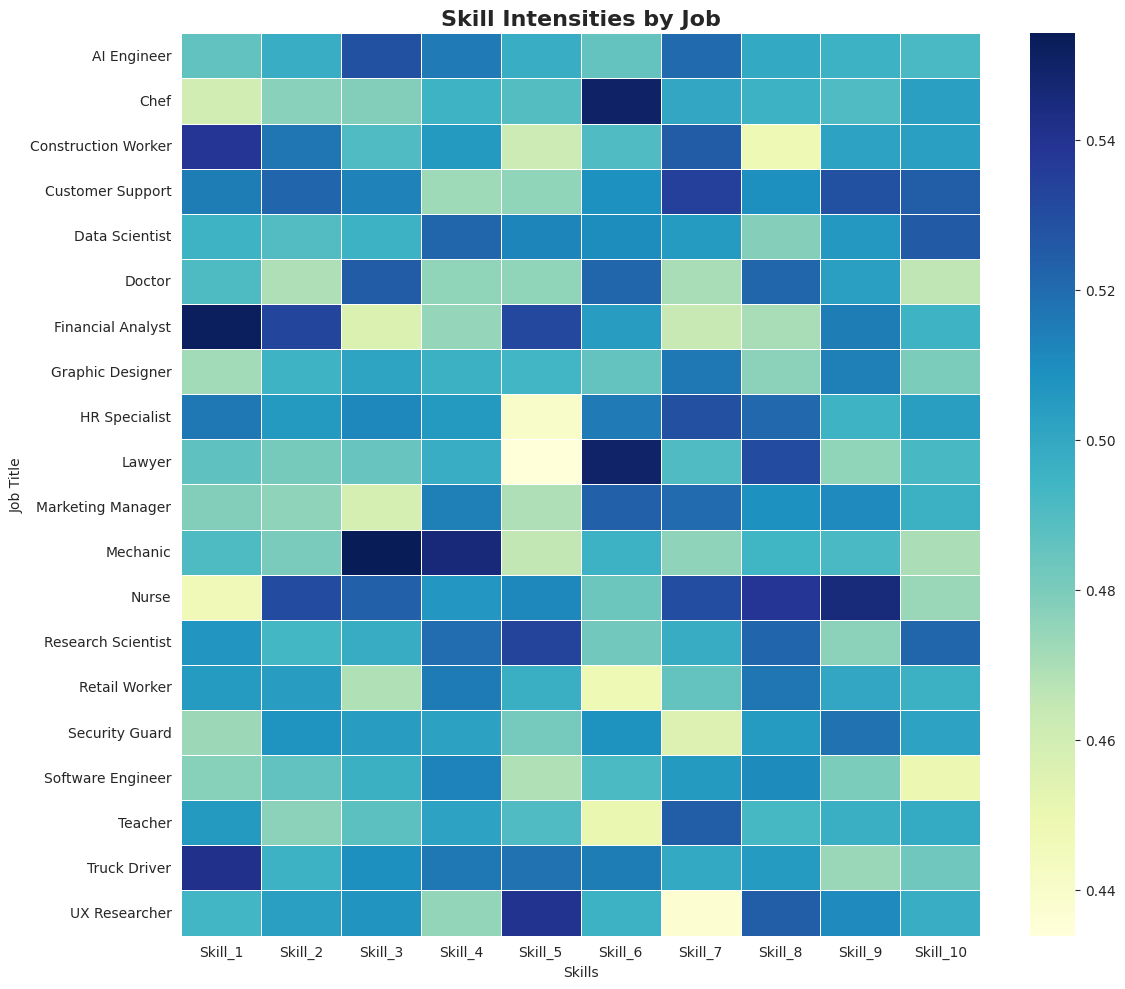

In [117]:

skill_cols = [f'Skill_{i}' for i in range(1, 11)]

skill_data = kaggle_df.groupby('Job_Title')[skill_cols].mean()

plt.figure(figsize=(12,10))
sns.heatmap(skill_data, cmap='YlGnBu', linewidths=0.5, annot=False)
plt.title("Skill Intensities by Job", fontsize=16, fontweight='bold')
plt.xlabel("Skills")
plt.ylabel("Job Title")
plt.tight_layout()
plt.show()
